NAMA :
1. IRMA FITRIANI  (12250325541)

2. RAHMA DEVI     (12250323758)

PTesla, Inc. (TSLA)

In [2]:
import yfinance as yf
import pandas as pd

# Tentukan kode saham untuk IHSG
kode_saham = "TSLA"

# Tentukan rentang waktu
start_date = "2019-01-01"
end_date = "2025-03-31"

# Ambil data menggunakan yfinance
df = yf.download(kode_saham, start=start_date, end=end_date)
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2019-01-02,20.674667,21.008667,19.920000,20.406668,174879000
2019-01-03,20.024000,20.626667,19.825333,20.466667,104478000
2019-01-04,21.179333,21.200001,20.181999,20.400000,110911500
2019-01-07,22.330667,22.449333,21.183332,21.448000,113268000
2019-01-08,22.356667,22.934000,21.801332,22.797333,105127500


In [3]:
# df.to_excel('IHSG.xlsx')

In [4]:
# Import data
import pandas as pd

# df = pd.read_excel('/content/IHSG.xlsx')
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
df = df.reset_index()
df.head()

,Date,Close,High,Low,Open,Volume
0,2019-01-02,20.674667,21.008667,19.920000,20.406668,174879000
1,2019-01-03,20.024000,20.626667,19.825333,20.466667,104478000
2,2019-01-04,21.179333,21.200001,20.181999,20.400000,110911500
3,2019-01-07,22.330667,22.449333,21.183332,21.448000,113268000
4,2019-01-08,22.356667,22.934000,21.801332,22.797333,105127500


In [5]:
# Mengambil kolom Date dan Close
data = df[['Date', 'Close']]
data.tail()

,Date,Close
1564,2025-03-24,278.390015
1565,2025-03-25,288.140015
1566,2025-03-26,272.059998
1567,2025-03-27,273.130005
1568,2025-03-28,263.549988


In [6]:
# data = data[data['Date'] >= '2020-01-01'].reset_index(drop=True)
# data.head()

In [7]:
# Melihat informasi pada data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1569 entries, 0 to 1568
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1569 non-null   datetime64[ns]
 1   Close   1569 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 24.6 KB


In [8]:
# Melihat data yang kosong
data.isna().sum()

,0
Date,0
Close,0


In [9]:
# Melihat deskripsi data
data.describe()

,Date,Close
count,1569,1569.000000
mean,2022-02-11 19:34:45.659655680,186.633554
min,2019-01-02 00:00:00,11.931333
25%,2020-07-23 00:00:00,99.166000
50%,2022-02-10 00:00:00,207.669998
75%,2023-09-05 00:00:00,255.710007
max,2025-03-28 00:00:00,479.859985
std,NaN,108.191904


In [10]:
# Import the libraries
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional

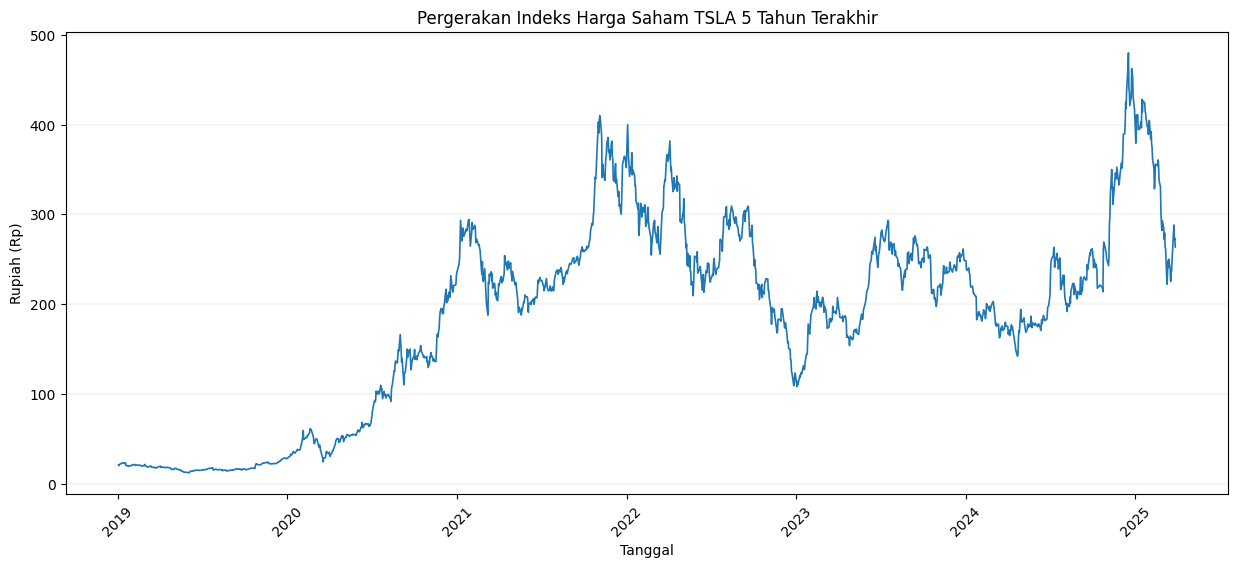

In [11]:
# Visualisasi data
import matplotlib.pyplot as plt
plt.style.use('default')

plt.figure(figsize=(15,6))
plt.title('Pergerakan Indeks Harga Saham TSLA 5 Tahun Terakhir')
plt.plot(data['Date'], data['Close'], linewidth=1.2)
plt.xlabel('Tanggal')
plt.ylabel('Rupiah (Rp)')
plt.xticks(rotation=45)
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

In [12]:
# Melakukan normalisasi data
sc = MinMaxScaler(feature_range=(0, 1))
data_sc = sc.fit_transform(data[['Close']].values)
data_sc

array([[0.01868519],
       [0.01729466],
       [0.0197637 ],
       ...,
       [0.55591523],
       [0.55820192],
       [0.53772868]])

In [13]:
# norm = pd.DataFrame(data_sc)
# norm.head()

In [14]:
# norm.to_excel('Hasil_Normalisasi.xlsx')

In [15]:
# Pembagian data (80% training, 10% testing, 10% validasi)
train_len = int(len(data_sc) * 0.8)
test_len = int(len(data_sc) * 0.10)
val_len = len(data_sc) - train_len - test_len

In [16]:
# Menampilkan jumlah data
print(f'Jumlah data keseluruhan: {len(data_sc)}')
print(f'Jumlah data training: {train_len}')
print(f'Jumlah data validasi: {val_len}')
print(f'Jumlah data testing:{test_len}')

Jumlah data keseluruhan: 1569
Jumlah data training: 1255
Jumlah data validasi: 158
Jumlah data testing:156


In [17]:
# Membuat Windowing pada data Training
train_data = data_sc[0:train_len  , : ]
x_train=[]
y_train = []
for i in range(30, len(train_data)):
    x_train.append(train_data[i-30:i,0])
    y_train.append(train_data[i,0])

In [18]:
# Mengubah tipe data list menjadi NumPy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [21]:
# Ubah bentuk data agar sesuai dengan input LSTM (samples, time_steps, features)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [22]:
# Membuat Windowing pada data Validation
val_data = data_sc[train_len - 30:(train_len + val_len) , : ]
x_val = []
y_val = []
for i in range(30,len(val_data)):
    x_val.append(val_data[i-30:i,0])
    y_val.append(val_data[i,0])

In [24]:
# Mengubah tipe data list menjadi NumPy array
x_val, y_val = np.array(x_val), np.array(y_val)

In [25]:
# Ubah bentuk data menjadi bentuk yang diterima oleh LSTM
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))


**1. Pemodelan dengan LSTM**

In [26]:
# Membangun model LSTM
import tensorflow as tf
from keras.layers import LSTM, Dropout, Dense, Input
from keras.models import Sequential

model_lstm = Sequential([
    Input(shape=(x_train.shape[1], 1)),
    LSTM(100, return_sequences=True),
    Dropout(0.2),
    LSTM(100, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

In [27]:
# Mendefinisikan fungsi Callback untuk model LSTM
import tensorflow as tf
import os
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Early Stopping
early_stopping_lstm = EarlyStopping(
    monitor="val_loss",
    patience=5,
    min_delta=0.0001,
    verbose=1,
    restore_best_weights=True
)

# Model Checkpoint khusus untuk model LSTM
checkpoint_path_lstm = 'model_checkpoints/weights_lstm_model.weights.h5'
checkpoint_dir_lstm = os.path.dirname(checkpoint_path_lstm)
checkpoint_lstm = ModelCheckpoint(
    filepath=checkpoint_path_lstm,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    save_weights_only=True,
    verbose=1
)

In [28]:
# Konfigurasi optimizer dan loss function untuk LSTM
optimizer_lstm = tf.keras.optimizers.RMSprop(learning_rate=0.0001)

# Compile model LSTM
model_lstm.compile(optimizer=optimizer_lstm, loss='mean_squared_error')

In [30]:
# Melakukan training pada model LSTM
history_lstm = model_lstm.fit(
    x_train, y_train,
    batch_size=8,
    epochs=100,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint_lstm, early_stopping_lstm]
)

Epoch 1/100
152/154 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0618
Epoch 1: val_loss improved from inf to 0.00417, saving model to model_checkpoints/weights_lstm_model.weights.h5
154/154 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.0610 - val_loss: 0.0042
Epoch 2/100
153/154 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037
Epoch 2: val_loss improved from 0.00417 to 0.00260, saving model to model_checkpoints/weights_lstm_model.weights.h5
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0037 - val_loss: 0.0026
Epoch 3/100
152/154 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0028
Epoch 3: val_loss did not improve from 0.00260
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0028 - val_loss: 0.0030
Epoch 4/100
151/154 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027
Epoch 4: val_loss improved from 0.00260 to 0.00241, saving model to model_checkpoints/weights_lstm_model.weights.h5
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0027 - val_loss: 0.0024
Epoch 5/100
153/154 ━━━━━━━━━━━━━━━━

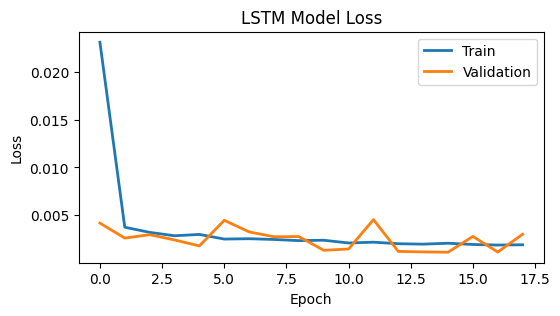

In [31]:
# Menampilkan plot nilai loss untuk model LSTM
plt.figure(figsize=(6,3))
plt.plot(history_lstm.history['loss'], linewidth=2)
plt.plot(history_lstm.history['val_loss'], linewidth=2)
plt.title('LSTM Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [32]:
# Membuat Windowing pada data testing
test_data = data_sc[(-test_len - 30): , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  data[['Close']].iloc[-test_len : , : ].values
for i in range(30,len(test_data)):
    x_test.append(test_data[i-30:i,0])
# Mengonversi x_test menjadi array numpy
x_test = np.array(x_test)
# Melakukan reshape untuk menambah dimensi fitur (1 fitur)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [33]:
# Mengubah tipe data list menjadi NumPy array
x_test = np.array(x_test)

In [34]:
# Ubah bentuk data menjadi bentuk yang diterima oleh LSTM
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [38]:
import os

# Cek apakah file bobot sudah ada
if os.path.exists('model_checkpoints/weights_lstm_model.weights.h5'):
    print("✅ Bobot LSTM ditemukan, memuat model...")
    model_lstm.load_weights('model_checkpoints/weights_lstm_model.weights.h5')
else:
    print("⚠️ Bobot LSTM TIDAK ditemukan, melakukan training model...")

    # Membuat folder jika belum ada
    if not os.path.exists('model_checkpoints'):
        os.makedirs('model_checkpoints')

    # Setup callback checkpoint
    checkpoint_lstm = ModelCheckpoint('model_checkpoints/weights_lstm_model.weights.h5',
                                      monitor='val_loss', mode='min',
                                      save_best_only=True, save_weights_only=True, verbose=1)
    earlystop_lstm = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Compile model
    model_lstm.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
                       loss='mean_squared_error')

    # Training model
    history_lstm = model_lstm.fit(x_train, y_train, epochs=100, batch_size=8,
                                  validation_data=(x_val, y_val),
                                  callbacks=[checkpoint_lstm, earlystop_lstm])



✅ Bobot LSTM ditemukan, memuat model...


In [39]:
# Memuat bobot model terbaik untuk LSTM
model_lstm.load_weights("/content/model_checkpoints/weights_lstm_model.weights.h5")

In [40]:
# Melakukan prediksi dengan model LSTM
y_pred_lstm = model_lstm.predict(x_test)
y_pred_lstm = np.ceil(sc.inverse_transform(y_pred_lstm))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


In [41]:
# Evaluasi menggunakan metrik MSE, RMSE, dan MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse_lstm = round(mean_squared_error(y_test, y_pred_lstm), 2)
rmse_lstm = round(np.sqrt(mean_squared_error(y_test, y_pred_lstm)), 2)
mae_lstm = round(mean_absolute_error(y_test, y_pred_lstm), 2)

print("Evaluasi Model LSTM")
print(f'MSE  : {mse_lstm}')
print(f'RMSE : {rmse_lstm}')
print(f'MAE  : {mae_lstm}')

Evaluasi Model LSTM
MSE  : 924.3
RMSE : 30.4
MAE  : 23.17


In [42]:
# DataFrame hasil prediksi LSTM
data_pred_lstm = data[-test_len:].copy()
data_pred_lstm['Prediction'] = y_pred_lstm
data_pred_lstm

,Date,Close,Prediction
1413,2024-08-14,201.380005,200.0
1414,2024-08-15,214.139999,199.0
1415,2024-08-16,216.119995,198.0
1416,2024-08-19,222.720001,199.0
1417,2024-08-20,221.100006,200.0
...,...,...,...
1564,2025-03-24,278.390015,231.0
1565,2025-03-25,288.140015,232.0
1566,2025-03-26,272.059998,236.0
1567,2025-03-27,273.130005,239.0


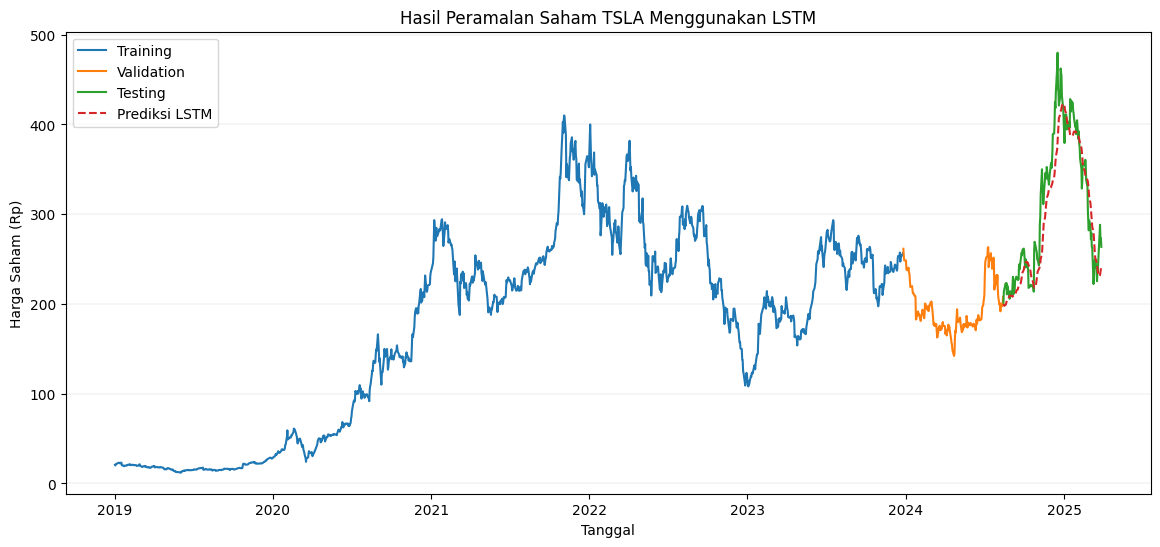

In [43]:
# Visualisasi Hasil Prediksi Saham TSLA dengan LSTM
train = data[:train_len]
valid = data[train_len:(train_len + val_len)]

plt.figure(figsize=(14,6))
plt.title('Hasil Peramalan Saham TSLA Menggunakan LSTM')
plt.plot(train['Date'], train['Close'], label='Training')
plt.plot(valid['Date'], valid['Close'], label='Validation')
plt.plot(data_pred_lstm['Date'], data_pred_lstm['Close'], label='Testing')
plt.plot(data_pred_lstm['Date'], data_pred_lstm['Prediction'], label='Prediksi LSTM', linestyle='--')
plt.xlabel('Tanggal')
plt.ylabel('Harga Saham (Rp)')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

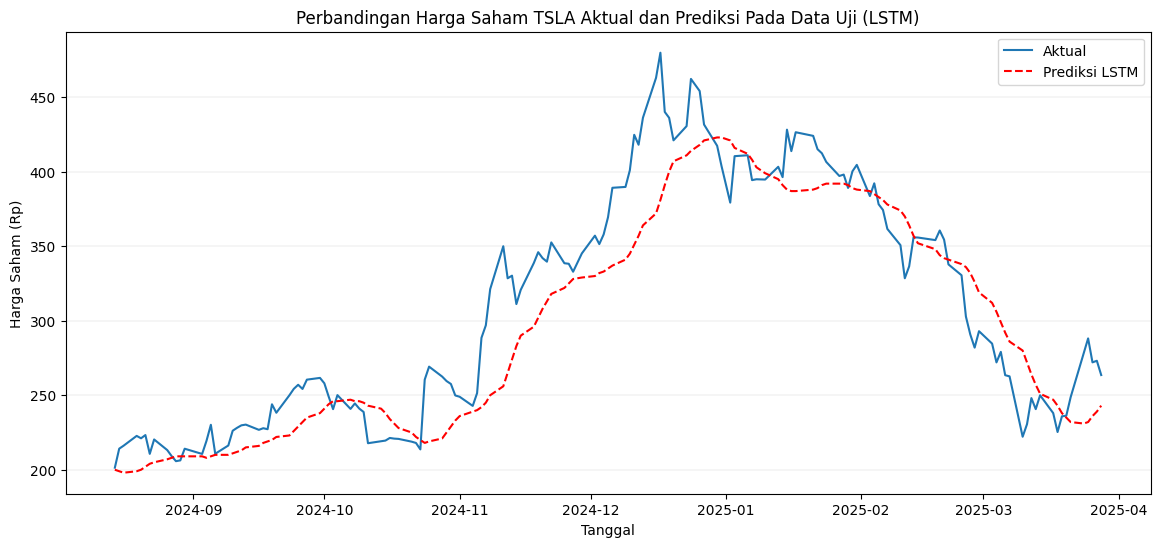

In [44]:
# Visualisasi Prediksi Data Uji Saham TSLA dengan LSTM
plt.figure(figsize=(14,6))
plt.title('Perbandingan Harga Saham TSLA Aktual dan Prediksi Pada Data Uji (LSTM)')
plt.xlabel('Tanggal')
plt.ylabel('Harga Saham (Rp)')
plt.plot(data_pred_lstm['Date'], data_pred_lstm['Close'], label='Aktual')
plt.plot(data_pred_lstm['Date'], data_pred_lstm['Prediction'],
label='Prediksi LSTM', color='red', linestyle='--')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

In [45]:
#Prediksi 30 hari ke depan dengan LSTM
from datetime import timedelta

# Ambil data terakhir sebagai input prediksi awal
last_input = x_test[-1]  # ambil data terakhir dari test set
future_input = last_input.reshape(1, last_input.shape[0], last_input.shape[1])

# Prediksi 30 hari ke depan dengan model LSTM
future_preds = []
for _ in range(30):
    next_pred = model_lstm.predict(future_input)
    future_preds.append(next_pred[0])
    # Update input untuk prediksi berikutnya
    future_input = np.append(future_input[:, 1:, :], [[next_pred[0]]], axis=1)

# Invers transform hasil prediksi ke skala asli
future_preds_inv = sc.inverse_transform(np.array(future_preds))

# Buat tanggal 30 hari ke depan (weekday saja)
last_date = pd.to_datetime(data['Date'].iloc[-1])
future_dates = []
curr_date = last_date + timedelta(days=1)

while len(future_dates) < 30:
    if curr_date.weekday() < 5:
        future_dates.append(curr_date)
    curr_date += timedelta(days=1)

# Buat DataFrame hasil prediksi LSTM
pred_30_lstm = pd.DataFrame({
    'Date': future_dates,
    'Prediction': np.ceil(future_preds_inv.flatten())
})

# Tampilkan hasil
pred_30_lstm.head()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━

,Date,Prediction
0,2025-03-31,243.0
1,2025-04-01,246.0
2,2025-04-02,247.0
3,2025-04-03,247.0
4,2025-04-04,247.0


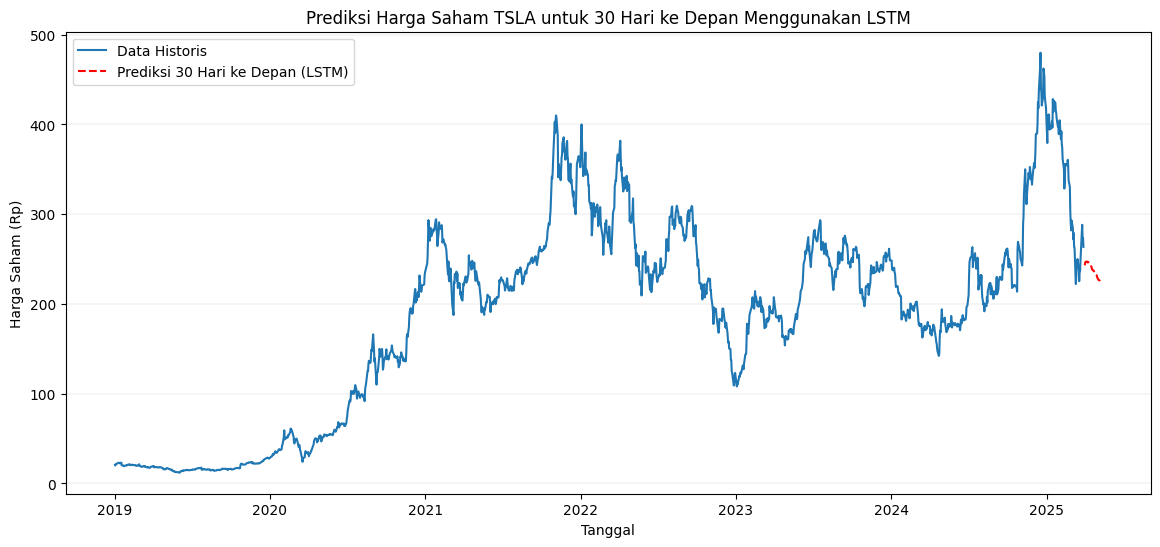

In [46]:
plt.figure(figsize=(14,6))
plt.title('Prediksi Harga Saham TSLA untuk 30 Hari ke Depan Menggunakan LSTM')
plt.plot(data['Date'], data['Close'], label='Data Historis')

# Garis prediksi 30 hari ke depan
plt.plot(pred_30_lstm['Date'], pred_30_lstm['Prediction'],
         label='Prediksi 30 Hari ke Depan (LSTM)', linestyle='--',
         color='red')

plt.xlabel('Tanggal')
plt.ylabel('Harga Saham (Rp)')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

**2. Pemodelan dengan Bi-LSTM**

In [47]:
# Membangun Model Bi-LSTM
import tensorflow as tf
from keras.layers import LSTM, Dropout, Dense, Input, Bidirectional
from keras.models import Sequential

model_bi_lstm = Sequential([
    Input(shape=(x_train.shape[1], 1)),
    Bidirectional(LSTM(100, return_sequences=True)),
    Dropout(0.2),
    Bidirectional(LSTM(100, return_sequences=False)),
    Dropout(0.2),
    Dense(1)
])

In [67]:
# Callback untuk Bi-LSTM
import tensorflow as tf
import os
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Early Stopping
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=5,
    min_delta=0.0001,
    verbose=1,
    restore_best_weights=True
)

# Model Checkpoint untuk Bi-LSTM
checkpoint_path = 'model_checkpoints/weights_bilstm.weights.h5'  # Disesuaikan untuk Bi-LSTM
checkpoint_dir = os.path.dirname(checkpoint_path)
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    save_weights_only=True,
    verbose=1
)

In [68]:
# Konfigurasi Optimizer dan Loss Function untuk Bi-LSTM
op = tf.keras.optimizers.RMSprop(learning_rate=0.0001)

# Compile Model Bi-LSTM
model_bi_lstm.compile(optimizer=op, loss='mean_squared_error')

In [51]:
# Melakukan training pada model Bi-LSTM
history_bi_lstm = model_bi_lstm.fit(
    x_train, y_train,
    batch_size=8,
    epochs=100,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint, early_stopping]
)

Epoch 1/100
153/154 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0020
Epoch 1: val_loss did not improve from 0.00110
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0020 - val_loss: 0.0012
Epoch 2/100
149/154 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0019
Epoch 2: val_loss improved from 0.00110 to 0.00106, saving model to model_checkpoints/weights_bilstm.weights.h5
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0019 - val_loss: 0.0011
Epoch 3/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0017
Epoch 3: val_loss did not improve from 0.00106
154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0017 - val_loss: 0.0012
Epoch 4/100
153/154 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0019
Epoch 4: val_loss improved from 0.00106 to 0.00096, saving model to model_checkpoints/weights_bilstm.weights.h5
154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0019 - val_loss: 9.6321e-04
Epoch 5/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0015
Epoch 5: val_loss improved fro

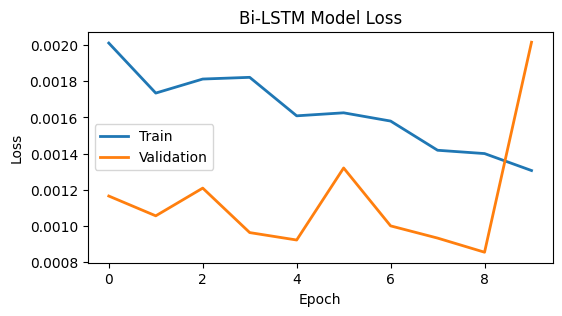

In [52]:
# Menampilkan plot nilai loss untuk Bi-LSTM
plt.figure(figsize=(6, 3))
plt.plot(history_bi_lstm.history['loss'], linewidth=2) # Loss pada data training
plt.plot(history_bi_lstm.history['val_loss'], linewidth=2) # Loss pada data validasi

plt.title('Bi-LSTM Model Loss') # Judul yang relevan dengan Bi-LSTM
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [53]:
# Membuat Windowing pada data testing
test_data = data_sc[(-test_len - 30): , : ] # Mengambil data yang diperlukan untuk testing

# Membuat dataset x_test dan y_test
x_test = [] # Menyimpan data input untuk 30 timesteps
y_test = data[['Close']].iloc[-test_len : , : ].values # Target: harga penutupan (Close)

# Membuat windowing data untuk x_test
for i in range(30, len(test_data)):
  x_test.append(test_data[i-30:i, 0]) # Mengambil 30 data terakhir sebagai input

# Mengonversi x_test menjadi array numpy
x_test = np.array(x_test)

# Melakukan reshape untuk menambah dimensi fitur (1 fitur)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1)) # Bentuk:(samples, timesteps, features)

In [54]:
# Mengubah tipe data list menjadi NumPy array
x_test = np.array(x_test)

In [55]:
# Ubah bentuk data menjadi bentuk yang diterima oleh Bi-LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [56]:
# Memuat bobot model terbaik untuk Bi-LSTM
model_bi_lstm.load_weights("model_checkpoints/weights_bilstm.weights.h5")

In [57]:
# Melakukan prediksi dengan model Bi-LSTM
y_pred_bilstm = model_bi_lstm.predict(x_test)

# Mengembalikan hasil prediksi ke skala asli
y_pred_bilstm = np.ceil(sc.inverse_transform(y_pred_bilstm))

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step


In [93]:
# Evaluasi menggunakan metrik MSE, RMSE, dan MAE untuk Bi-LSTM
mse_bilstm = round(mean_squared_error(y_test, y_pred_bilstm), 2)
rmse_bilstm = round(np.sqrt(np.mean((y_test - y_pred_bilstm) ** 2)), 2)
mae_bilstm = round(mean_absolute_error(y_test, y_pred_bilstm), 2)

# Cetak hasil evaluasi
print("Evaluasi Model Bi-LSTM")
print(f'MSE  : {mse_bilstm}')
print(f'RMSE : {rmse_bilstm}')
print(f'MAE  : {mae_bilstm}')

Evaluasi Model Bi-LSTM
MSE  : 585.42
RMSE : 24.2
MAE  : 17.99


In [94]:
# Membuat DataFrame hasil prediksi Bi-LSTM
data_pred_bilstm = data[-test_len:].copy()
data_pred_bilstm['Prediction'] = y_pred_bilstm
data_pred_bilstm

,Date,Close,Prediction
1413,2024-08-14,201.380005,205.0
1414,2024-08-15,214.139999,204.0
1415,2024-08-16,216.119995,205.0
1416,2024-08-19,222.720001,207.0
1417,2024-08-20,221.100006,209.0
...,...,...,...
1564,2025-03-24,278.390015,239.0
1565,2025-03-25,288.140015,244.0
1566,2025-03-26,272.059998,250.0
1567,2025-03-27,273.130005,254.0


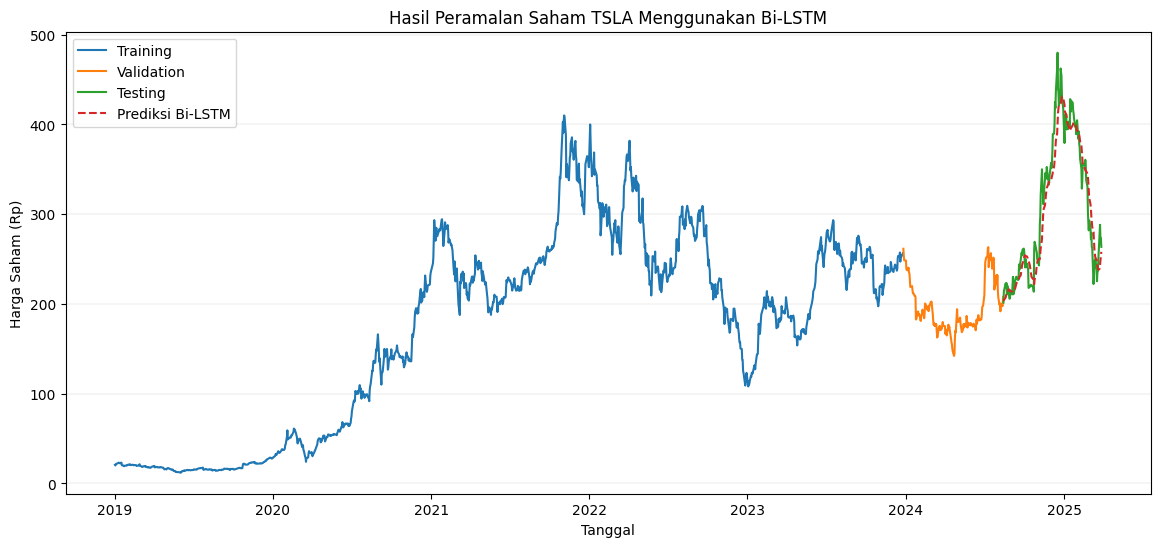

In [95]:
# Visualisasi Hasil Prediksi Saham TSLA dengan Bi-LSTM
train = data[:train_len]
valid = data[train_len:(train_len + val_len)]

plt.figure(figsize=(14,6))
plt.title('Hasil Peramalan Saham TSLA Menggunakan Bi-LSTM')
plt.plot(train['Date'], train['Close'], label='Training')
plt.plot(valid['Date'], valid['Close'], label='Validation')
plt.plot(data_pred_bilstm['Date'], data_pred_bilstm['Close'], label='Testing')
plt.plot(data_pred_bilstm['Date'], data_pred_bilstm['Prediction'],
         label='Prediksi Bi-LSTM', linestyle='--')
plt.xlabel('Tanggal')
plt.ylabel('Harga Saham (Rp)')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

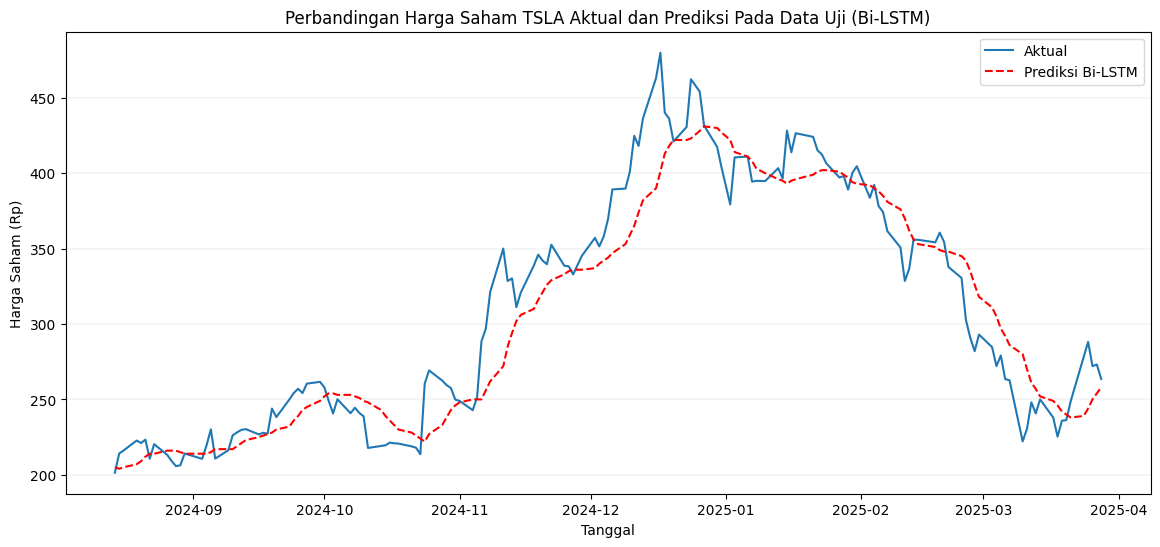

In [96]:
# Visualisasi Prediksi Data Uji Saham TSLA dengan Bi-LSTM
plt.figure(figsize=(14,6))
plt.title('Perbandingan Harga Saham TSLA Aktual dan Prediksi Pada Data Uji (Bi-LSTM)')
plt.xlabel('Tanggal')
plt.ylabel('Harga Saham (Rp)')
plt.plot(data_pred_bilstm['Date'], data_pred_bilstm['Close'], label='Aktual')
plt.plot(data_pred_bilstm['Date'], data_pred_bilstm['Prediction'],
         label='Prediksi Bi-LSTM', color='red', linestyle='--')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

In [97]:
from datetime import timedelta

# Ambil data terakhir sebagai input prediksi awal
last_input = x_test[-1]  # ambil data terakhir dari test set
future_input = last_input.reshape(1, last_input.shape[0], last_input.shape[1])

# Prediksi 30 hari ke depan dengan model Bi-LSTM
future_preds_bilstm = []

for _ in range(30):
    next_pred = model_bi_lstm.predict(future_input)
    future_preds_bilstm.append(next_pred[0])

    # Update input untuk prediksi berikutnya
    future_input = np.append(future_input[:, 1:, :], [[next_pred[0]]], axis=1)

# Invers transform hasil prediksi ke skala asli
future_preds_inv_bilstm = sc.inverse_transform(future_preds_bilstm)

# Buat tanggal 30 hari ke depan (weekday saja)
last_date = pd.to_datetime(data['Date'].iloc[-1])
future_dates = []
curr_date = last_date + timedelta(days=1)

while len(future_dates) < 30:
    if curr_date.weekday() < 5:  # weekday: Senin-Jumat (0–4)
        future_dates.append(curr_date)
    curr_date += timedelta(days=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━

In [98]:
# DataFrame hasil prediksi Bi-LSTM
pred_30_bilstm = pd.DataFrame({
    'Date': future_dates,
    'Prediction': np.ceil(future_preds_inv_bilstm.flatten())
})

# Tampilkan hasil
pred_30_bilstm.head()

,Date,Prediction
0,2025-03-31,258.0
1,2025-04-01,259.0
2,2025-04-02,260.0
3,2025-04-03,260.0
4,2025-04-04,260.0


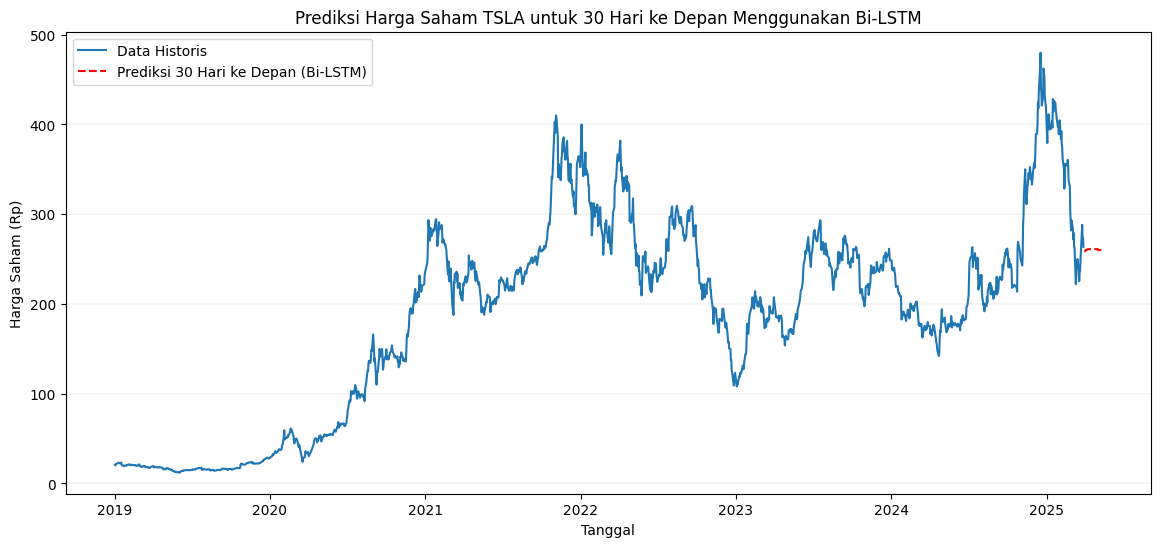

In [99]:
# Prediksi Harga Saham TSLA untuk 30 Hari ke Depan Bi-LSTM
plt.figure(figsize=(14,6))
plt.title('Prediksi Harga Saham TSLA untuk 30 Hari ke Depan Menggunakan Bi-LSTM')
plt.plot(data['Date'], data['Close'], label='Data Historis')

# Garis prediksi 30 hari ke depan
plt.plot(pred_30_bilstm['Date'], pred_30_bilstm['Prediction'],
         label='Prediksi 30 Hari ke Depan (Bi-LSTM)', linestyle='--',
    color='red')

plt.xlabel('Tanggal')
plt.ylabel('Harga Saham (Rp)')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

**3. Pemodelan dengan Stacked LSTM**

In [65]:
# Membangun Model Stacked LSTM
import tensorflow as tf
from keras.layers import LSTM, Dropout, Dense, Input
from keras.models import Sequential

model_stacked_lstm = Sequential([
    Input(shape=(x_train.shape[1], 1)),
    LSTM(100, return_sequences=True),
    Dropout(0.2),
    LSTM(100, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

In [66]:
# Callback untuk Stacked LSTM
import tensorflow as tf
import os
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Early Stopping
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=5,
    min_delta=0.0001,
    verbose=1,
    restore_best_weights=True
)

# Model Checkpoint untuk Stacked LSTM
checkpoint_path = 'model_checkpoints/weights_stacked_lstm.weights.h5'  # Disesuaikan untuk Stacked LSTM
checkpoint_dir = os.path.dirname(checkpoint_path)
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    save_weights_only=True,
    verbose=1
)

In [71]:
# Konfigurasi Optimizer dan Loss Function untuk Stacked LSTM
op = tf.keras.optimizers.RMSprop(learning_rate=0.0001)

# Compile Model stacked LSTM
model_stacked_lstm.compile(optimizer=op, loss='mean_squared_error')

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import RMSprop

# Misal input_shape-nya (timesteps, features)
timesteps = 10
features = 5

# Inisialisasi model stacked LSTM
model_stacked_lstm = Sequential()
model_stacked_lstm.add(LSTM(64, return_sequences=True, input_shape=(timesteps, features)))
model_stacked_lstm.add(LSTM(32))
model_stacked_lstm.add(Dense(1))

# Compile model
optimizer = RMSprop(learning_rate=0.0001)
model_stacked_lstm.compile(optimizer=optimizer, loss='mean_squared_error')

# Training model
history_stacked_lstm = model_stacked_lstm.fit(
    x_train, y_train,
    batch_size=8,
    epochs=100,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint, early_stopping]
)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


146/154 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0706
Epoch 1: val_loss improved from inf to 0.00143, saving model to model_checkpoints/weights_bilstm.weights.h5
154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0687 - val_loss: 0.0014
Epoch 2/100
146/154 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0051
Epoch 2: val_loss did not improve from 0.00143
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0050 - val_loss: 0.0017
Epoch 3/100
150/154 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0019
Epoch 3: val_loss did not improve from 0.00143
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0019 - val_loss: 0.0040
Epoch 4/100
150/154 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0017
Epoch 4: val_loss did not improve from 0.00143
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0017 - val_loss: 0.0021
Epoch 5/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0016
Epoch 5: val_loss improved from 0.00143 to 0.00140, saving model to model_checkpoints/weights_bilstm.weights.h5
154/154 ━━━

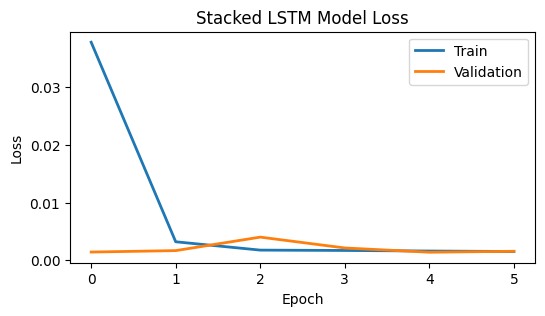

In [75]:
# Menampilkan plot nilai loss untuk Stacked LSTM
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 3))
plt.plot(history_stacked_lstm.history['loss'], linewidth=2)       # Loss pada data training
plt.plot(history_stacked_lstm.history['val_loss'], linewidth=2)   # Loss pada data validasi

plt.title('Stacked LSTM Model Loss')  # Judul yang relevan dengan stacked LSTM
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [76]:
# Membuat Windowing pada data testing
test_data = data_sc[(-test_len - 30): , : ] # Mengambil data yang diperlukan untuk testing

# Membuat dataset x_test dan y_test
x_test = [] # Menyimpan data input untuk 30 timesteps
y_test = data[['Close']].iloc[-test_len : , : ].values # Target: harga penutupan (Close)

# Membuat windowing data untuk x_test
for i in range(30, len(test_data)):
  x_test.append(test_data[i-30:i, 0]) # Mengambil 30 data terakhir sebagai input

# Mengonversi x_test menjadi array numpy
x_test = np.array(x_test)

# Melakukan reshape untuk menambah dimensi fitur (1 fitur)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1)) # Bentuk:(samples, timesteps, features)

In [77]:
# Mengubah tipe data list menjadi NumPy array
x_test = np.array(x_test)

In [78]:
# Ubah bentuk data menjadi bentuk yang diterima oleh Stacked LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [80]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    filepath="model_checkpoints/weights_stacked_lstm.weights.h5",
    save_best_only=True,
    monitor='val_loss',
    mode='min'
)

In [81]:
os.makedirs("model_checkpoints", exist_ok=True)

In [82]:
# Melakukan prediksi dengan model Stacked LSTM
y_pred_stacked_lstm = model_stacked_lstm.predict(x_test)

# Mengembalikan hasil prediksi ke skala asli
y_pred_stacked_lstm = np.ceil(sc.inverse_transform(y_pred_stacked_lstm))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


In [83]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Evaluasi menggunakan metrik MSE, RMSE, dan MAE untuk Stacked LSTM
mse_stacked = round(mean_squared_error(y_test, y_pred_stacked_lstm), 2)
rmse_stacked = round(np.sqrt(np.mean((y_test - y_pred_stacked_lstm) ** 2)), 2)
mae_stacked = round(mean_absolute_error(y_test, y_pred_stacked_lstm), 2)

# Cetak hasil evaluasi
print("Evaluasi Model Stacked LSTM")
print(f'MSE  : {mse_stacked}')
print(f'RMSE : {rmse_stacked}')
print(f'MAE  : {mae_stacked}')


Evaluasi Model Stacked LSTM
MSE  : 3523.16
RMSE : 59.36
MAE  : 45.75


In [84]:
# Membuat DataFrame hasil prediksi Stacked LSTM
data_pred_stacked_lstm = data[-test_len:].copy()
data_pred_stacked_lstm['Prediction'] = y_pred_stacked_lstm
data_pred_stacked_lstm


,Date,Close,Prediction
1413,2024-08-14,201.380005,207.0
1414,2024-08-15,214.139999,206.0
1415,2024-08-16,216.119995,206.0
1416,2024-08-19,222.720001,206.0
1417,2024-08-20,221.100006,206.0
...,...,...,...
1564,2025-03-24,278.390015,232.0
1565,2025-03-25,288.140015,232.0
1566,2025-03-26,272.059998,234.0
1567,2025-03-27,273.130005,235.0


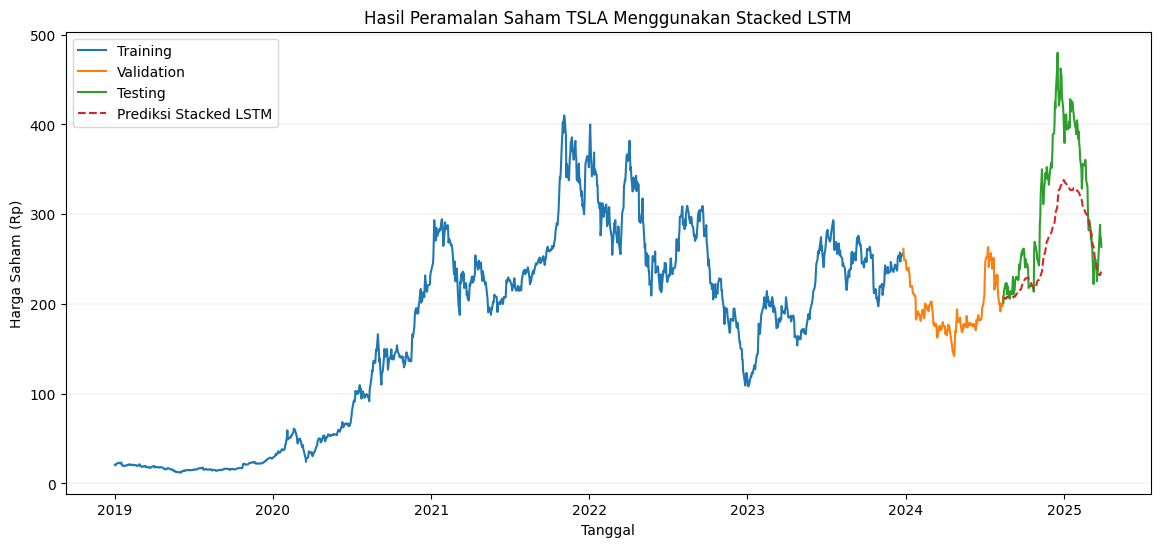

In [85]:
# Visualisasi Hasil Prediksi Saham TSLA dengan Stacked LSTM
train = data[:train_len]
valid = data[train_len:(train_len + val_len)]

plt.figure(figsize=(14,6))
plt.title('Hasil Peramalan Saham TSLA Menggunakan Stacked LSTM')
plt.plot(train['Date'], train['Close'], label='Training')
plt.plot(valid['Date'], valid['Close'], label='Validation')
plt.plot(data_pred_stacked_lstm['Date'], data_pred_stacked_lstm['Close'], label='Testing')
plt.plot(data_pred_stacked_lstm['Date'], data_pred_stacked_lstm['Prediction'],
         label='Prediksi Stacked LSTM', linestyle='--')
plt.xlabel('Tanggal')
plt.ylabel('Harga Saham (Rp)')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

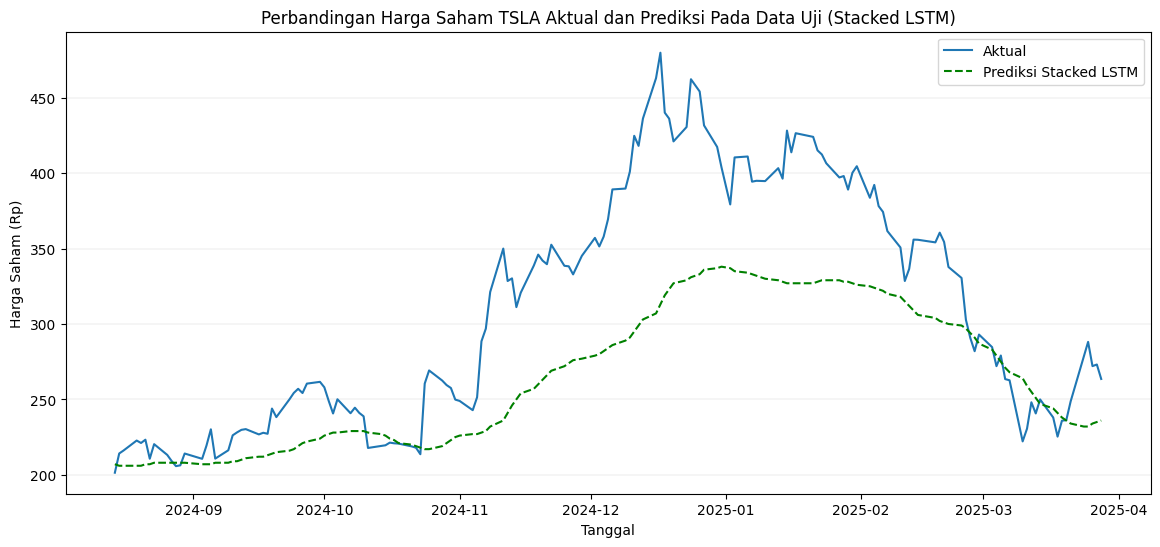

In [86]:
# Visualisasi Prediksi Data Uji Saham TSLA dengan Stacked LSTM
plt.figure(figsize=(14,6))
plt.title('Perbandingan Harga Saham TSLA Aktual dan Prediksi Pada Data Uji (Stacked LSTM)')
plt.xlabel('Tanggal')
plt.ylabel('Harga Saham (Rp)')

# Plot data aktual dan prediksi Stacked LSTM
plt.plot(data_pred_stacked_lstm['Date'], data_pred_stacked_lstm['Close'], label='Aktual')
plt.plot(data_pred_stacked_lstm['Date'], data_pred_stacked_lstm['Prediction'],
         label='Prediksi Stacked LSTM', color='green', linestyle='--')

plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

In [87]:
from datetime import timedelta

# Ambil data terakhir sebagai input prediksi awal
last_input = x_test[-1]  # ambil data terakhir dari test set
future_input = last_input.reshape(1, last_input.shape[0], last_input.shape[1])

# Prediksi 30 hari ke depan dengan model Stacked LSTM
future_preds_stacked = []

for _ in range(30):
    next_pred = model_stacked_lstm.predict(future_input)
    future_preds_stacked.append(next_pred[0])

    # Update input untuk prediksi berikutnya
    future_input = np.append(future_input[:, 1:, :], [[next_pred[0]]], axis=1)

# Invers transform hasil prediksi ke skala asli
future_preds_inv_stacked = sc.inverse_transform(future_preds_stacked)

# Buat tanggal 30 hari ke depan (weekday saja)
last_date = pd.to_datetime(data['Date'].iloc[-1])
future_dates = []
curr_date = last_date + timedelta(days=1)

while len(future_dates) < 30:
    if curr_date.weekday() < 5:  # weekday: Senin-Jumat (0–4)
        future_dates.append(curr_date)
    curr_date += timedelta(days=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━

In [88]:
# DataFrame hasil prediksi Stacked LSTM
pred_30_stacked = pd.DataFrame({
    'Date': future_dates,
    'Prediction': np.ceil(future_preds_inv_stacked.flatten())
})

# Tampilkan hasil
pred_30_stacked.head()

,Date,Prediction
0,2025-03-31,236.0
1,2025-04-01,236.0
2,2025-04-02,235.0
3,2025-04-03,234.0
4,2025-04-04,232.0


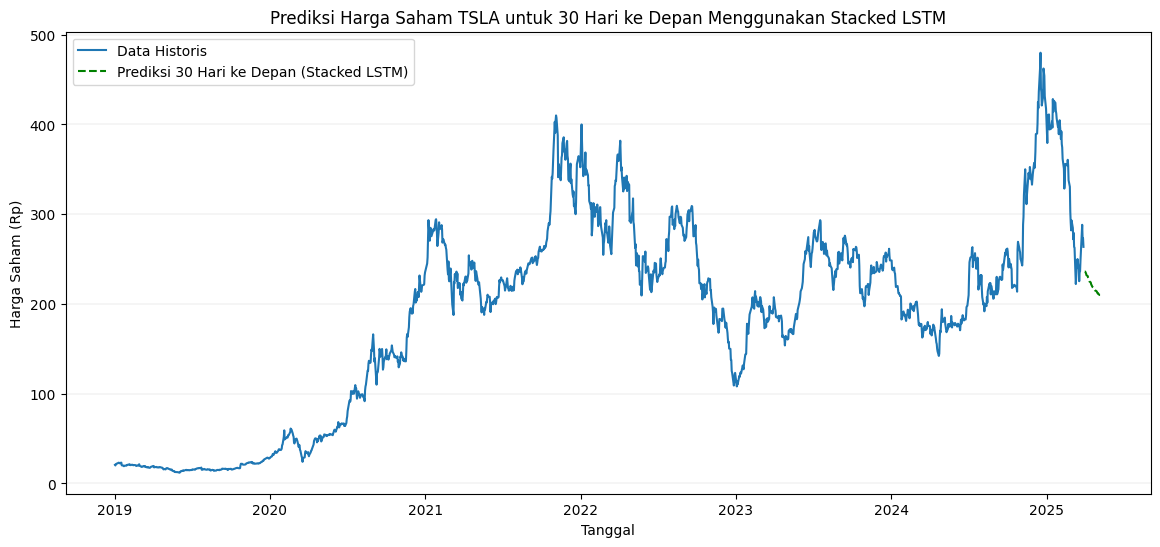

In [89]:
# Prediksi Harga Saham TSLA untuk 30 Hari ke Depan Stacked LSTM
plt.figure(figsize=(14,6))
plt.title('Prediksi Harga Saham TSLA untuk 30 Hari ke Depan Menggunakan Stacked LSTM')
plt.plot(data['Date'], data['Close'], label='Data Historis')

# Garis prediksi 30 hari ke depan
plt.plot(pred_30_stacked['Date'], pred_30_stacked['Prediction'],
         label='Prediksi 30 Hari ke Depan (Stacked LSTM)', linestyle='--',
    color='green')

plt.xlabel('Tanggal')
plt.ylabel('Harga Saham (Rp)')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

**3. Perbandingan Model LSTM, Bi-LSTM dan Stacked LSTM**


In [100]:
# Evaluasi Metrik untuk LSTM
print("Evaluasi Model LSTM")
# print(f'MSE : {mse_lstm}')
print(f'RMSE : {rmse_lstm}')
# print(f'MAE : {mae_lstm}')

# Evaluasi Metrik untuk Bi-LSTM
print("Evaluasi Model Bi-LSTM")
# print(f'MSE : {mse_bilstm}')
print(f'RMSE : {rmse_bilstm}')
# print(f'MAE : {mae_bilstm}')

# Evaluasi Metrik untuk Stacked LSTM
print("Evaluasi Model Stacked LSTM")
# print(f'MSE : {mse_stacked}')
print(f'RMSE : {rmse_stacked}')
# print(f'MAE : {mae_stacked}')

Evaluasi Model LSTM
RMSE : 30.4
Evaluasi Model Bi-LSTM
RMSE : 24.2
Evaluasi Model Stacked LSTM
RMSE : 59.36


In [101]:
import time

# Waktu training untuk LSTM
start_lstm = time.time()
history_lstm = model_lstm.fit(x_train, y_train, batch_size=8, epochs=100,
                              validation_data=(x_val, y_val), callbacks=[checkpoint, early_stopping])
end_lstm = time.time()
print(f"Training Time for LSTM: {end_lstm - start_lstm:.2f} seconds")

# Waktu training untuk Bi-LSTM
start_bilstm = time.time()
history_bi_lstm = model_bi_lstm.fit(x_train, y_train, batch_size=8, epochs=100,
                                    validation_data=(x_val, y_val), callbacks=[checkpoint, early_stopping])
end_bilstm = time.time()
print(f"Training Time for Bi-LSTM: {end_bilstm - start_bilstm:.2f} seconds")

# Waktu training untuk Stacked LSTM
start_stacked = time.time()
history_stacked = model_stacked_lstm.fit(x_train, y_train, batch_size=8, epochs=100,
                                         validation_data=(x_val, y_val), callbacks=[checkpoint, early_stopping])
end_stacked = time.time()
print(f"Training Time for Stacked LSTM: {end_stacked - start_stacked:.2f} seconds")

Epoch 1/100
151/154 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0019

154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0019 - val_loss: 0.0014
Epoch 2/100
147/154 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0018

154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0018 - val_loss: 0.0014
Epoch 3/100
153/154 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0018

154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0018 - val_loss: 0.0011
Epoch 4/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0018

154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0018 - val_loss: 0.0010
Epoch 5/100
152/154 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0020

154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0020 - val_loss: 0.0010
Epoch 6/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0019 - val_loss: 0.0014
Epoch 7/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 8/100
151/154 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0017

154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0017 - val_loss: 0.0010
Epoch 8: early stopping
Restoring model weights from the end of the best epoch: 3.
Training Time for LSTM: 10.95 seconds
Epoch 1/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0015

154/154 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.0015 - val_loss: 7.9817e-04
Epoch 2/100
151/154 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0013

154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0013 - val_loss: 7.3449e-04
Epoch 3/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0012 - val_loss: 7.4936e-04
Epoch 4/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 5/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 6/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0012

154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0012 - val_loss: 7.0312e-04
Epoch 6: early stopping
Restoring model weights from the end of the best epoch: 1.
Training Time for Bi-LSTM: 15.26 seconds
Epoch 1/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0053 - val_loss: 0.0025
Epoch 2/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 3/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0018 - val_loss: 0.0014
Epoch 4/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 5/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0014 - val_loss: 0.0018
Epoch 6/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0014 - val_loss: 0.0019
Epoch 7/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 8/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0012 - val_loss: 0.0045
Epoch 9/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0013 - val_loss: 0.0046
Epoch 10/100


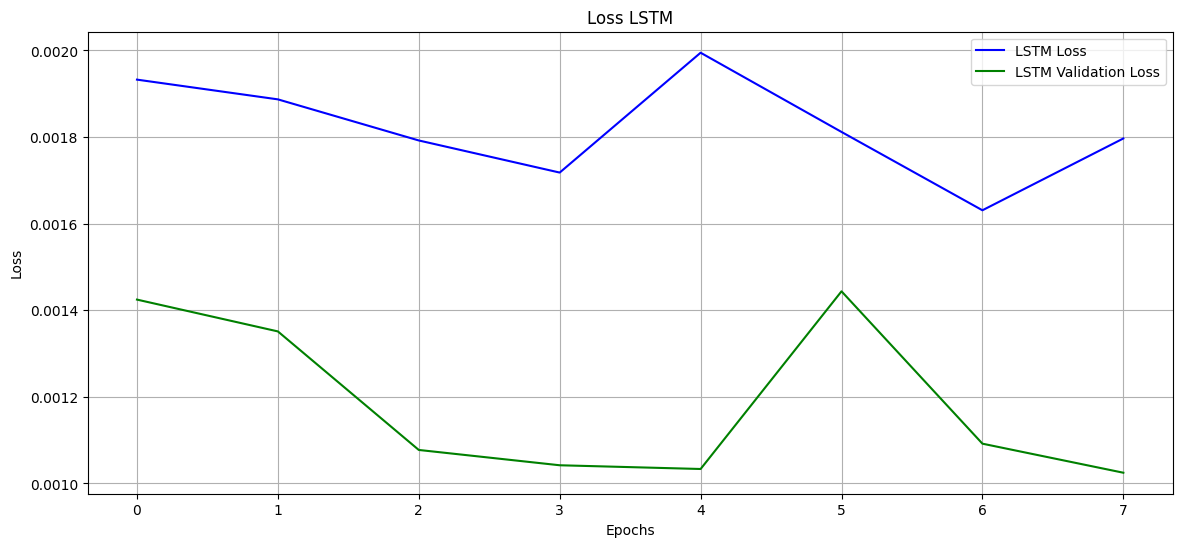

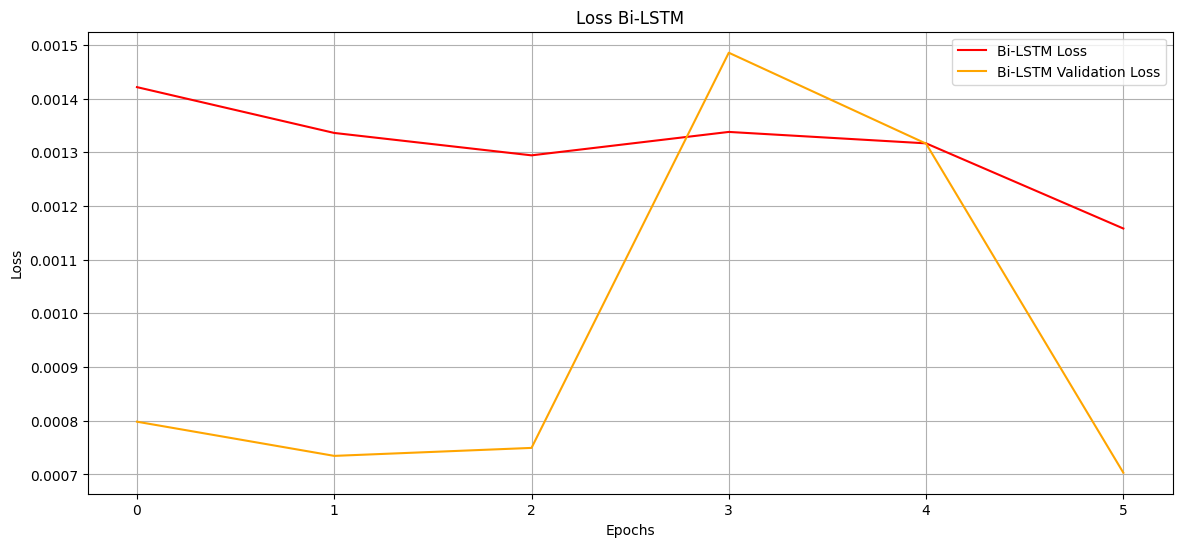

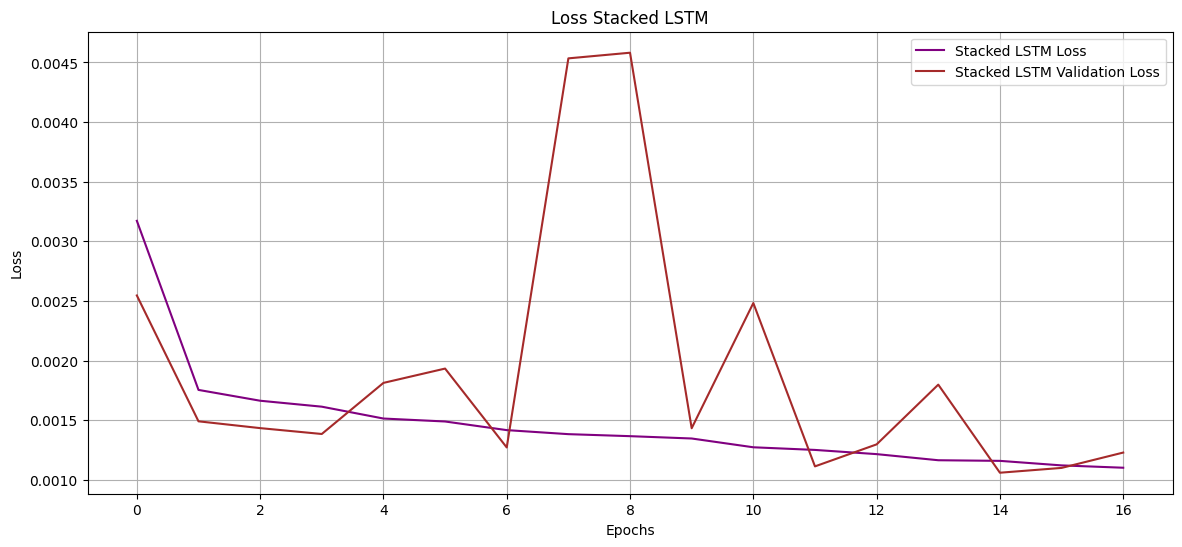

In [104]:
# Grafik loss untuk LSTM
plt.figure(figsize=(14,6))
plt.plot(history_lstm.history['loss'], label='LSTM Loss', color='blue')
plt.plot(history_lstm.history['val_loss'], label='LSTM Validation Loss', color='green')
plt.title('Loss LSTM')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Grafik loss untuk Bi-LSTM
plt.figure(figsize=(14,6))
plt.plot(history_bi_lstm.history['loss'], label='Bi-LSTM Loss', color='red')
plt.plot(history_bi_lstm.history['val_loss'], label='Bi-LSTM Validation Loss', color='orange')
plt.title('Loss Bi-LSTM')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Grafik loss untuk Stacked LSTM
plt.figure(figsize=(14,6))
plt.plot(history_stacked.history['loss'], label='Stacked LSTM Loss', color='purple')
plt.plot(history_stacked.history['val_loss'], label='Stacked LSTM Validation Loss', color='brown')
plt.title('Loss Stacked LSTM')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

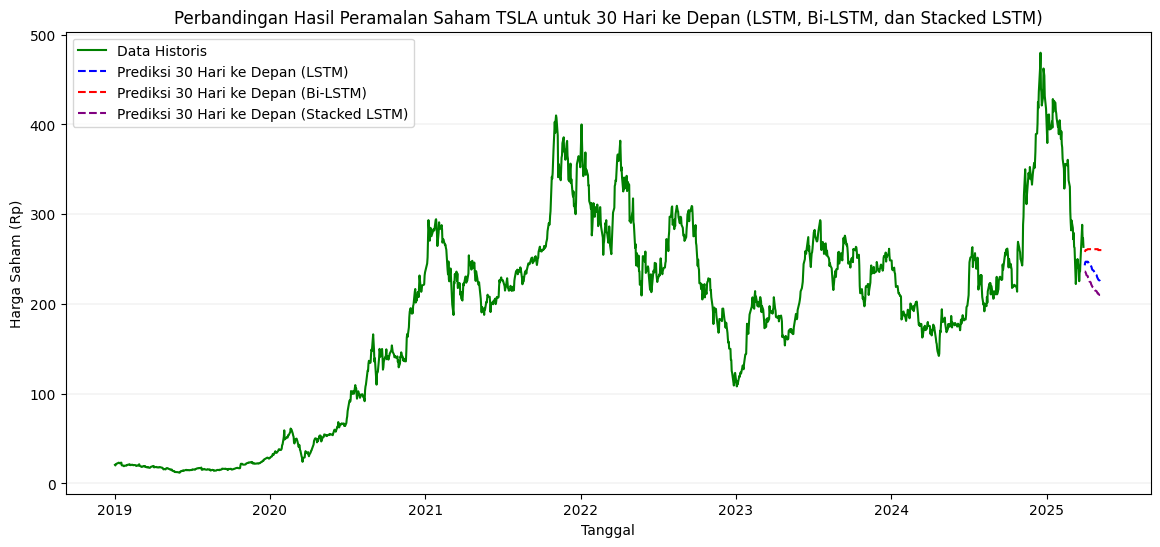

In [105]:
# Visualisasi Perbandingan Hasil Prediksi Saham TSLA untuk 30 Hari ke Depan (LSTM, Bi-LSTM, dan Stacked LSTM)
plt.figure(figsize=(14,6))
plt.title('Perbandingan Hasil Peramalan Saham TSLA untuk 30 Hari ke Depan (LSTM, Bi-LSTM, dan Stacked LSTM)')
plt.xlabel('Tanggal')
plt.ylabel('Harga Saham (Rp)')

# Plotkan harga saham historis
plt.plot(data['Date'], data['Close'], label='Data Historis', color='green')

# Plotkan prediksi menggunakan LSTM
plt.plot(pred_30_lstm['Date'], pred_30_lstm['Prediction'],
         label='Prediksi 30 Hari ke Depan (LSTM)', linestyle='--', color='blue')

# Plotkan prediksi menggunakan Bi-LSTM
plt.plot(pred_30_bilstm['Date'], pred_30_bilstm['Prediction'],
         label='Prediksi 30 Hari ke Depan (Bi-LSTM)', linestyle='--', color='red')

# Plotkan prediksi menggunakan Stacked LSTM
plt.plot(pred_30_stacked['Date'], pred_30_stacked['Prediction'],
         label='Prediksi 30 Hari ke Depan (Stacked LSTM)', linestyle='--', color='purple')

# Menambahkan legend dan grid
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()